# Kaggle-Google play application dataset

# (statistical pratice)

## 2019-04-30 start

# Summary

## Describe statistics

- Data except rating is dispersion


- The distribution of data except rating is possitive distribution,

  and rating is negative distribution
  
  
- All kurtosis of data is leptokurtic


## Category--Rating

- Education apps has the highest average rating than other apps

- Dating apps has the lowest average rating

- Game apps is 6th,which is higher than health and fitness apps


## Interval for all apps rating mean

- The 95% confidence interval for all apps rating mean is 

  (4.19129~4.19187)


## all apps rating mean v.s. sample data rating mean

- H0:mu1=4.19


- H1:mu1!=4.19


- all apps rating mean is different from sample data rating mean


## Correlation--Rating and Reviews

- Rating and Reviews has small correlation


- If use least-square method,the residual range is large

  which means using this method has less effect
  
  
- With scatter,can see correlation is small

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import math
sns.set()

In [2]:
original=pd.read_csv('./googleplaystore.csv')

In [3]:
print(original.head())
print(original.shape)
print(original.columns)
print(original.isnull().sum())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

# Data Preprocessing

In [4]:
original['Rating']=original['Rating'].fillna(round(np.mean(original['Rating']),2))

In [5]:
original.dropna(inplace=True)

In [6]:
print(original.isnull().sum())
print(original.shape)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
(10829, 13)


In [7]:
for i in range(original.index.shape[0]):
    original.iloc[i,4]=re.sub(r'[M]','',str(original.iloc[i,4]))

In [8]:
original.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
for i in range(original.index.shape[0]):
    original.iloc[i,5]=re.sub(r'\D','',str(original.iloc[i,5]))

In [10]:
for i in range(original.index.shape[0]):
    original.iloc[i,4]=re.sub(r'[k]','000',str(original.iloc[i,4]))

In [11]:
for i in range(original.index.shape[0]):
    if original.iloc[i,4]=='Varies with device':
        original.iloc[i,4]=0

In [12]:
original['Size']=original['Size'].astype('float')
print(original['Size'].mean()/100)

130.31913325330135


In [13]:
for i in range(original.index.shape[0]):
    if original.iloc[i,4]==0:
        original.iloc[i,4]=round(np.mean(original['Size'])/100,1)

In [14]:
original['Reviews']=original['Reviews'].astype('int')
original['Installs']=original['Installs'].astype('int')

In [15]:
original['Price'].unique()[0:5]

array(['0', '$4.99', '$3.99', '$6.99', '$1.49'], dtype=object)

In [16]:
for i in range(original.index.shape[0]):
    original.iloc[i,7]=re.sub('[$]','',str(original.iloc[i,7]))

In [17]:
original['Price']=original['Price'].astype('float')

In [18]:
original.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,130.5,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.50,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [19]:
original.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Describe statistics

In [20]:
de1=list(stats.describe(original.loc[:,'Rating']))
de2=list(stats.describe(original.loc[:,'Reviews']))
de3=list(stats.describe(original.loc[:,'Size']))
de4=list(stats.describe(original.loc[:,'Installs']))
de5=list(stats.describe(original.loc[:,'Price']))
des=pd.DataFrame()
des['Rating']=de1
des['Reviews']=de2
des['Size']=de3
des['Installs']=de4
des['Price']=de5
x=['n','(min,max)','mean','variance','skewness','kurtosis']
des.index=x
des

,Rating,Reviews,Size,Installs,Price
n,10829,10829,10829,10829,10829
"(min,max)","(1.0, 5.0)","(0, 78158306)","(1.0, 1020000.0)","(0, 1000000000)","(0.0, 400.0)"
mean,4.19159,444602,13052.3,1.54799e+07,1.02809
variance,0.229477,8.58029e+12,8.37205e+09,7.2371e+15,254.651
skewness,-1.98814,16.4391,8.01405,9.56582,23.6921
kurtosis,7.16014,340.559,67.3909,100.128,577.286


In [21]:
def cv(data):
    standard=data.std()
    xbar=data.mean()
    return round((standard/xbar)*100,2)

In [22]:
print('coefficient of variation')
print('=============================')
print('Rating:%1.2f%%'%cv(original['Rating']))
print('Reviews:%1.2f%%'%cv(original['Reviews']))
print('Size:%1.2f%%'%cv(original['Size']))
print('Installs:%1.2f%%'%cv(original['Installs']))
print('Price:%1.2f%%'%cv(original['Price']))
print('=============================')

coefficient of variation
Rating:11.43%
Reviews:658.84%
Size:701.02%
Installs:549.56%
Price:1552.18%


c:\users\az11438\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


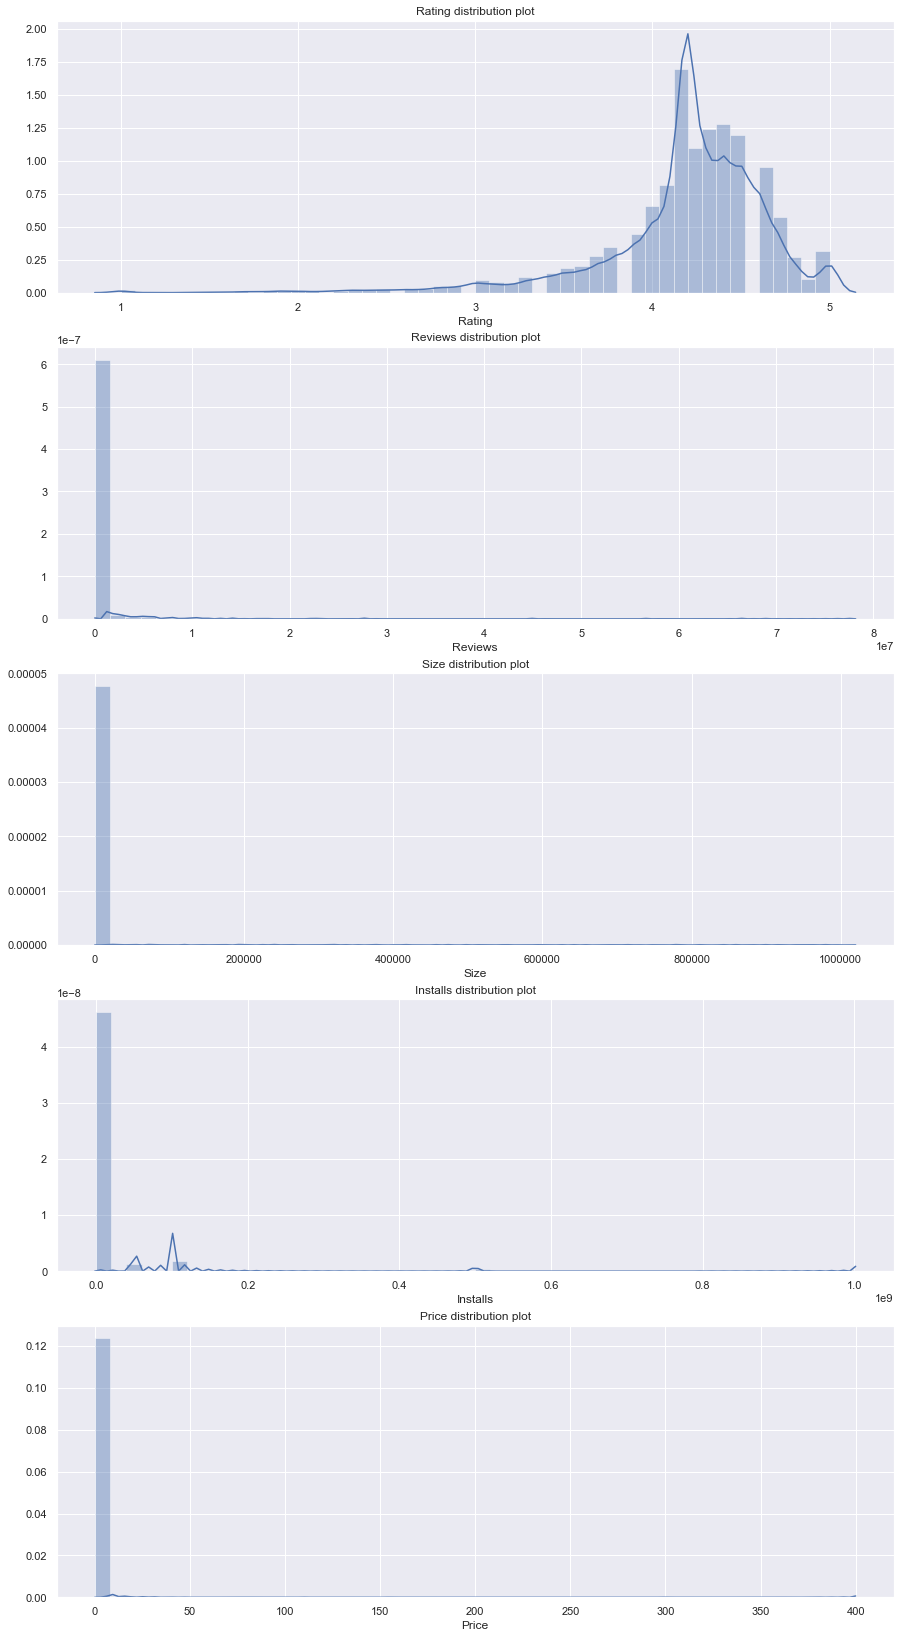

In [23]:
x=['Rating','Reviews','Size','Installs','Price']
z0=plt.figure(figsize=(15,35))
for i in range(len(x)):
    z0.add_subplot(6,1,i+1)
    sns.distplot(original[str(x[i])])
    plt.title('%s distribution plot'%str(x[i]))
else:
    pass
z0.savefig('./charts/googleplay_distribution.png')
plt.show()

# Describe Statistics Summary

- data except Rating is dispersion


- Rating is negative distribution

  and other data are possitive distribution


- All of data kurtosis are leptokurtic


- Range of data except rating is large

# Question Definition


- Which category has the highest average rating?


- What is the interval of all apps rating mean?


- Is the mean of all apps rating similar to data's mean?


- Is rating and reviews has correlation?



# Category--rating

In [28]:
cateRating=pd.DataFrame(original.groupby(by='Category').mean()['Rating'])

In [31]:
RatingSort=cateRating.sort_values(by='Rating',ascending=False)

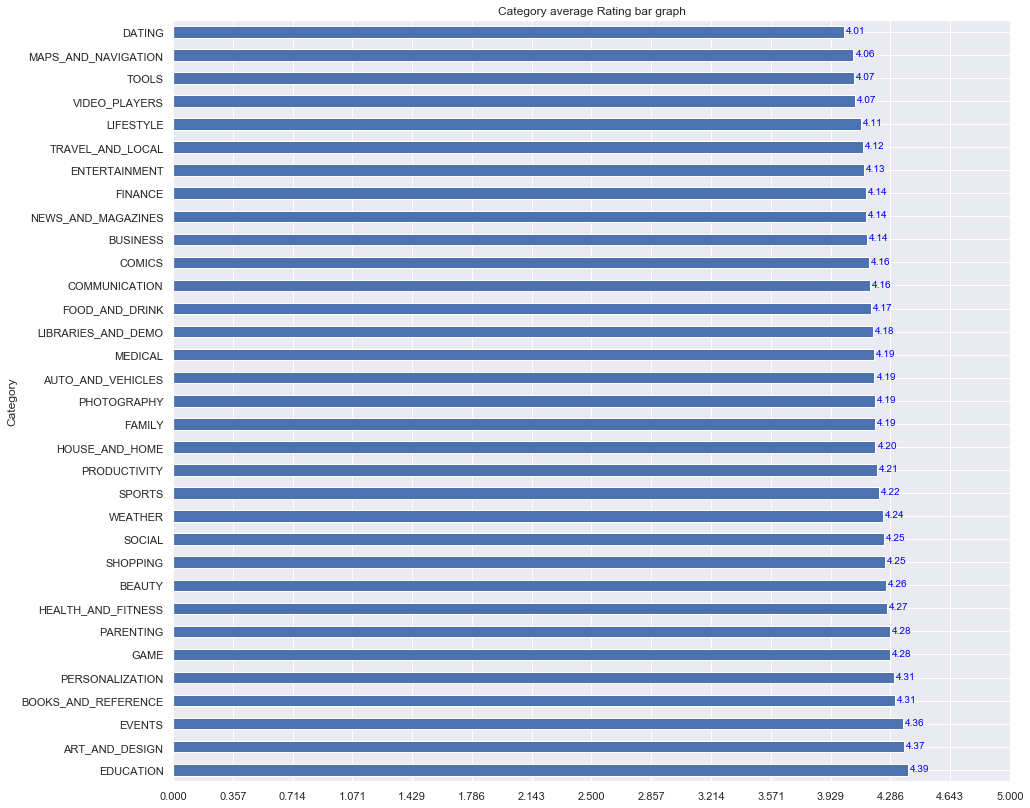

In [44]:
z1=RatingSort.plot.barh(figsize=(15,14),legend=False)
z1.get_figure()
plt.title('Category average Rating bar graph',fontsize='large')
plt.xticks(np.linspace(0,5,15))
r=np.array(RatingSort['Rating'])
x=np.arange(RatingSort.index.shape[0])
for i,j in zip(x,r):
    plt.text(j+0.07,i-0.05,'%1.2f'%j,ha='center',color='blue')
else:
    pass
plt.savefig('./charts/average_rating_by_category.png')
plt.show()

# Category rating Summary

- Education apps has highest average rating than other category


- Dating apps has lowest average rating than other category


- Game apps is 6th,which is higher than health apps

# confidence interval for population mean

alpha=0.05

In [57]:
print('sample mean:',original.loc[:,'Rating'].mean())
print()
print('Rating 95% confidence interval:')
stats.norm.interval(0.05,loc=original.loc[:,'Rating'].mean(),scale=stats.sem(original.loc[:,'Rating']))

sample mean: 4.191588327638747

Rating 95% confidence interval:


(4.1912996652398204, 4.191876990037673)

# interval for all apps mean Summary

Set the confidence coefficient to 0.05,

means 95% confidence interval,

with using stats.norm.interval,

95% confidence interval is 

(4.19129~4.19187)

Because sample data is large,

using the z score,

so confidnece interval is small.


# Test


All apps rating mean=mu1

H0:mu1=4.19

H1:mu1!=4.19

alpha=0.05

(two-side test)

In [49]:
def zstar(data):
    para=4.2
    up=data.mean()-para
    down=data.std()/math.sqrt(len(data))
    return up/down

In [51]:
alpha=0.05
teststats=zstar(original.loc[:,'Rating'])
zalpha=stats.norm.pdf(alpha/2)
if math.fabs(teststats)<=zalpha:
    print('|',teststats,'|','<=',zalpha)
    print('not reject H0')
else:
    print('|',teststats,'|','>',zalpha)
    print('reject H0')

| -1.827286383161421 | > 0.39881763041638185
reject H0


# Test summary

With using two-side test,

with alpha=0.05,

test statistics is in reject region,

which means population mean is different from sample mean

# Correlation

In [65]:
x=original.loc[:,['Rating','Reviews']].corr()
r=x.iloc[1,0]

In [66]:
def b1(data1,data2,r):
    return r*(data2.std()/data1.std())
def b2(co1,data1,data2):
    return data2.mean()-(co1*data1.mean())

In [67]:
coe1=b1(original['Rating'],original['Reviews'],r)
coe2=b2(coe1,original['Rating'],original['Reviews'])
print(coe2,'+',coe1,'x')

-1300547.4393746746 + 416345.5639488423 x


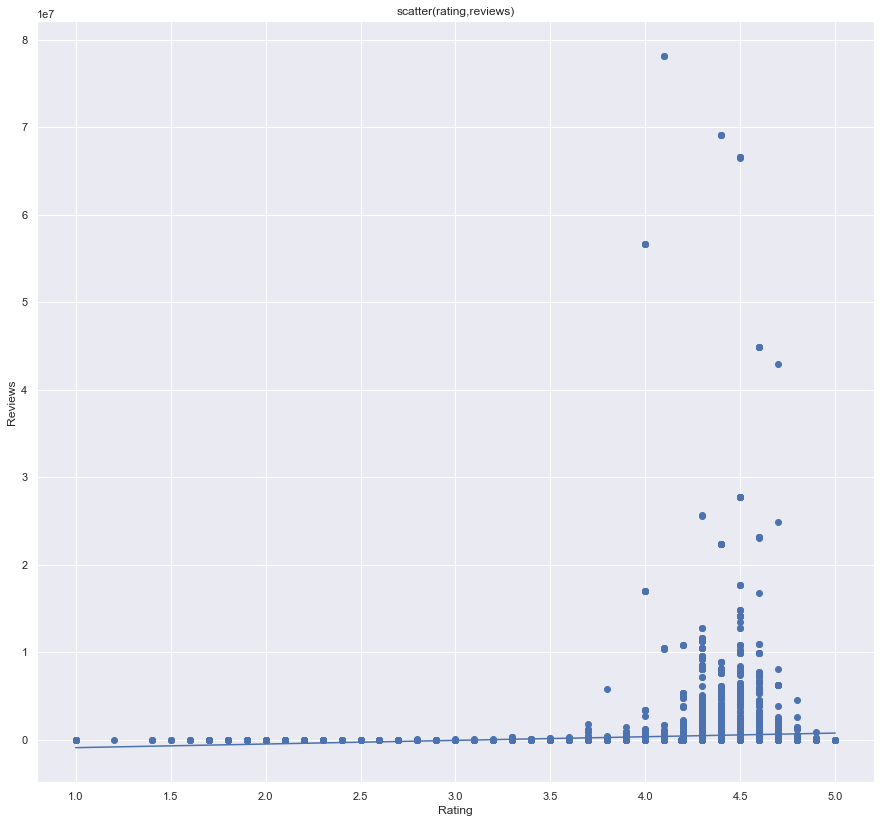

In [69]:
x=np.array(original['Rating'])
y=np.array(original['Reviews'])
x1=np.linspace(np.min(x),np.max(x),1000)
y1=x1*coe1+coe2
z2=plt.figure(figsize=(15,14))
plt.scatter(x,y)
plt.plot(x1,y1)
plt.title('scatter(rating,reviews)')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.savefig('./charts/rating_reviews_scatter.png')
plt.show()

In [76]:
sampledata=original.loc[:,['Rating','Reviews']].sample(1000)
sampledata['predict']=sampledata['Rating']*coe1+coe2
sampledata['Residual']=sampledata['Reviews']-sampledata['predict']
sampledata.head()

,Rating,Reviews,predict,Residual
3889,4.40,5453997,531373.042000,4.922624e+06
8315,4.50,375996,573007.598395,-1.970116e+05
3654,4.50,309617,573007.598395,-2.633906e+05
6962,4.19,0,443940.473571,-4.439405e+05
7604,4.50,121533,573007.598395,-4.514746e+05


In [78]:
stats.describe(sampledata['Residual'])

DescribeResult(nobs=1000, minmax=(-781179.3803695368, 27149256.401604883), mean=-96031.49026652216, variance=2989949699185.471, skewness=9.761621574409446, kurtosis=115.59590764263936)

# Correlation summary

- Reviews and Rating has small correlation


- With using least-squares,

  the scatter shows that a lot part of data is higher than predict value
  
  
  
- With describing residual,range is large,

  and mean is -96031,
  
  which means using least-squares to predict is less effect.